In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from matplotlib.colors import ListedColormap

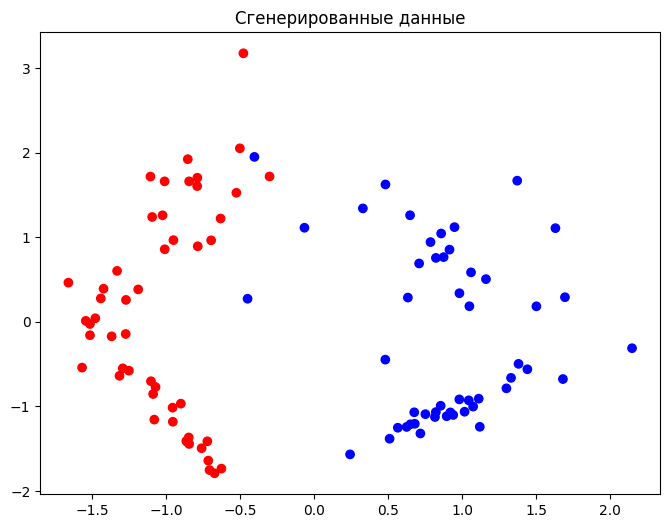

In [2]:
# Сгенерируем данные
classes = datasets.make_classification(n_samples=100, n_features=2,
                                      n_informative=2, n_redundant=0,
                                      n_classes=2, random_state=1)

# Визуализируем
colors = ListedColormap(['red', 'blue'])
plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.title("Сгенерированные данные")
plt.show()

In [3]:
# Перемешивание
np.random.seed(12)
shuffle_index = np.random.permutation(classes[0].shape[0])
X_shuffled, y_shuffled = classes[0][shuffle_index], classes[1][shuffle_index]

# Разбиение на train/test
train_proportion = 0.7
train_test_cut = int(len(classes[0]) * train_proportion)

X_train, X_test = X_shuffled[:train_test_cut], X_shuffled[train_test_cut:]
y_train, y_test = y_shuffled[:train_test_cut], y_shuffled[train_test_cut:]

# Транспонирование для удобства работы
X_train_tr = X_train.T
y_train_tr = y_train.reshape(1, -1)
X_test_tr = X_test.T
y_test_tr = y_test.reshape(1, -1)

print("Размеры обучающей выборки:", X_train_tr.shape, y_train_tr.shape)
print("Размеры тестовой выборки:", X_test_tr.shape, y_test_tr.shape)

Размеры обучающей выборки: (2, 70) (1, 70)
Размеры тестовой выборки: (2, 30) (1, 30)


In [4]:
def log_loss(w, X, y):
    m = X.shape[1]
    A = 1 / (1 + np.exp(-np.dot(w.T, X)))  # сигмоида
    epsilon = 1e-15  # избегаем деления на ноль в log
    loss = -1/m * np.sum(y * np.log(A + epsilon) + (1 - y) * np.log(1 - A + epsilon))
    grad = 1/m * np.dot(X, (A - y).T)
    return loss, grad

In [5]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    for i in range(n_iterations):
        loss, grad = log_loss(w, X, y)
        w -= eta * grad
        losses.append(loss)
    return w, losses

In [6]:
def predict(w, X, b=0.5):
    m = X.shape[1]
    A = 1 / (1 + np.exp(-np.dot(w.T, X)))
    y_predicted = (A >= b).astype(int)
    return y_predicted

In [7]:
# Инициализация весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 1000
eta = 0.05

# Обучение
w_opt, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)

# Предсказания
y_pred_train = predict(w_opt, X_train_tr)
y_pred_test = predict(w_opt, X_test_tr)

# Оценка точности
train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train_tr)) * 100
test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test_tr)) * 100

print(f"Итоговый вектор весов: {w_opt}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}%")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}%")

Итоговый вектор весов: [[3.72659902]
 [0.22383415]]
Точность на обучающей выборке: 98.571%
Точность на тестовой выборке: 96.667%


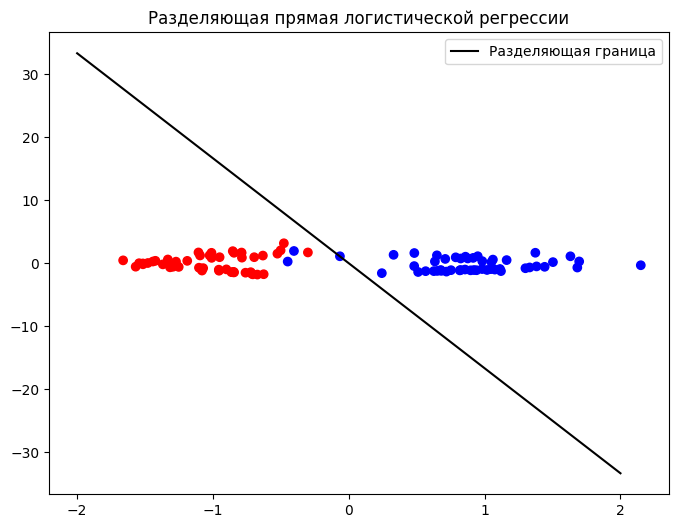

In [8]:
data = np.linspace(-2, 2, 100)

plt.figure(figsize=(8, 6))
plt.scatter([x[0] for x in classes[0]], [x[1] for x in classes[0]], c=classes[1], cmap=colors)
plt.plot(data, -(w_opt[0,0]/w_opt[1,0])*data, color='black', label="Разделяющая граница")
plt.legend()
plt.title("Разделяющая прямая логистической регрессии")
plt.show()

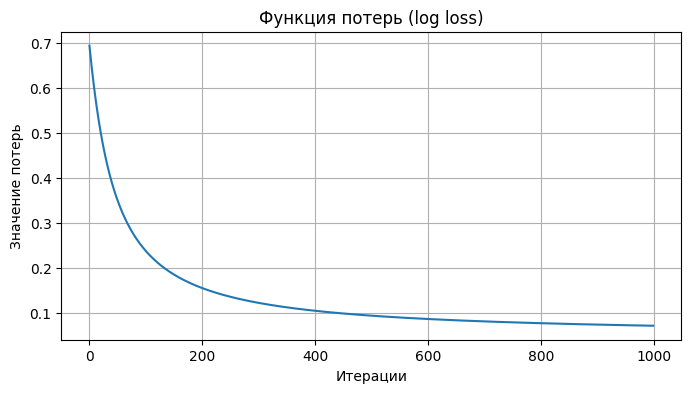

In [9]:
plt.figure(figsize=(8, 4))
plt.plot(range(len(losses)), losses)
plt.title("Функция потерь (log loss)")
plt.xlabel("Итерации")
plt.ylabel("Значение потерь")
plt.grid(True)
plt.show()